In [19]:
# 1. Data Exploration and Preprocessing
import pandas as pd

df = pd.read_csv("blogs_categories.csv")
print(df.shape)
print(df.isnull().sum())
print(df['Labels'].value_counts())
df.head()

(19997, 3)
Unnamed: 0    0
Data          0
Labels        0
dtype: int64
Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64


,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [20]:
import nltk
#nltk.download('all')


In [22]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (run this only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())  # Remove punctuation, lowercase
    tokens = word_tokenize(text)                    # Tokenize
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens 
              if word not in stop_words and len(word) > 2]  # Remove stopwords and short words
    return " ".join(tokens)

# Apply to your DataFrame (assuming df is already loaded)
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\APPY\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [23]:
df = pd.read_csv("blogs_categories.csv")


In [24]:
#Feature Extraction: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Cleaned_Data']).toarray()
y = df['Labels']

KeyError: 'Cleaned_Data'

In [ ]:
#2. Naive Bayes Text Classification
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Train the Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#3. Sentiment Analysis
#Use TextBlob or VADER
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

In [26]:
print(df.columns)


Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')


In [27]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [28]:
print(df[['Data', 'Labels', 'Sentiment']].head())


                                                Data       Labels Sentiment
0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism  Positive
1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism  Positive
2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   Neutral
3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   Neutral
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism  Negative


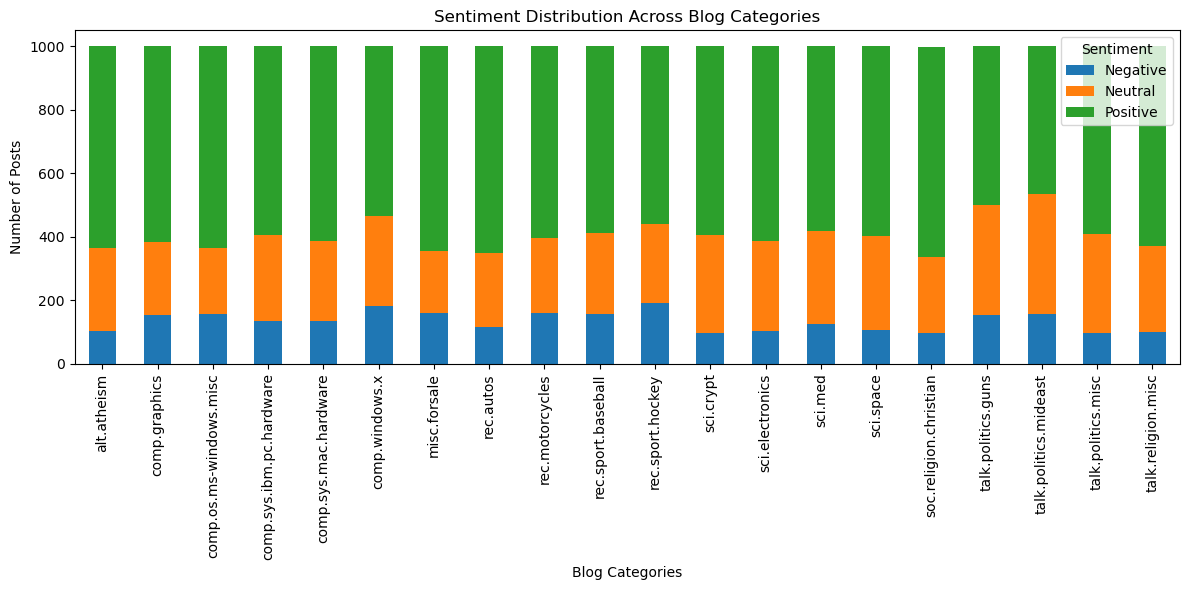

In [29]:
import matplotlib.pyplot as plt

# Group by category and sentiment
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plot
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12,6), title="Sentiment Distribution Across Blog Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

In [35]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word, pos="v") for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

# Apply preprocessing
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Define features and labels
X = df['Cleaned_Data']
y = df['Labels']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Now define y_pred
y_pred = nb_model.predict(X_test_tfidf)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.88525

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.81      0.79      0.80       173
           comp.graphics       0.80      0.85      0.82       179
 comp.os.ms-windows.misc       0.89      0.86      0.88       226
comp.sys.ibm.pc.hardware       0.84      0.78      0.81       204
   comp.sys.mac.hardware       0.85      0.94      0.90       205
          comp.windows.x       0.88      0.89      0.88       186
            misc.forsale       0.84      0.89      0.87       190
               rec.autos       0.84      0.93      0.88       203
         rec.motorcycles       0.97      0.92      0.94       218
      rec.sport.baseball       0.97      0.95      0.96       192
        rec.sport.hockey       0.96      0.97      0.96       203
               sci.crypt       0.97      0.97      0.97       200
         sci.electronics       0.93      0.86      0.90       227
                 sci.med       0

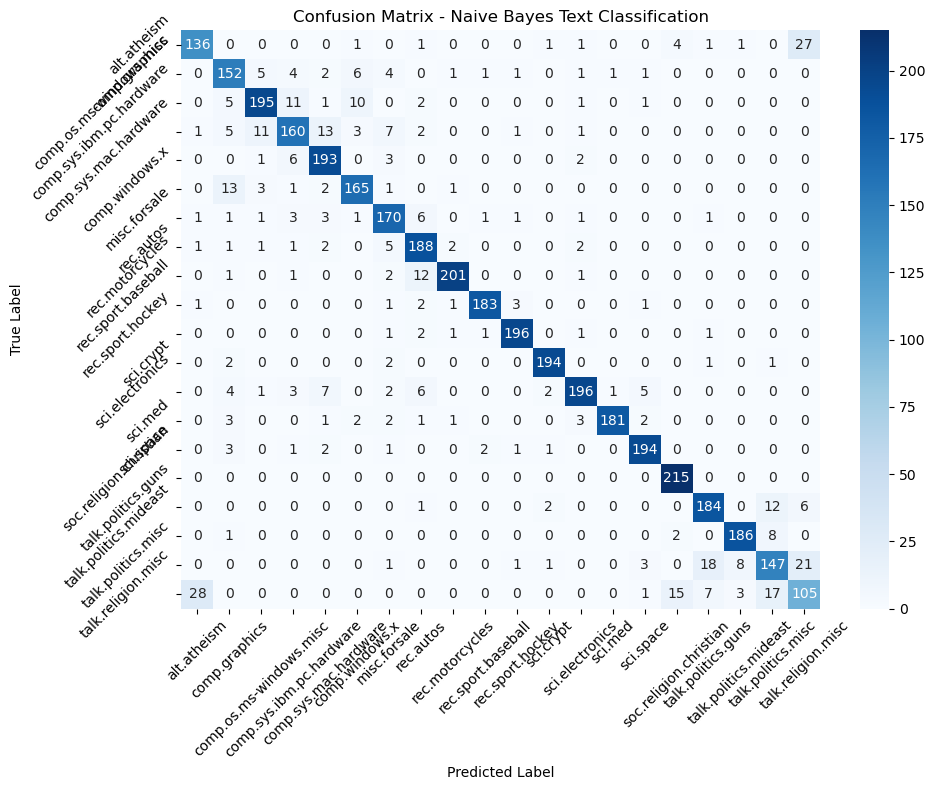

In [40]:
#Heatmap for Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels (sorted for consistent display)
labels = sorted(df['Labels'].unique())

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Naive Bayes Text Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Discussion
#Challenges with text variety, imbalance of categories.

#Naive Bayes assumptions vs real-world text.

#Observations from sentiment analysis: e.g., “Technology” blogs are mostly neutral, “Health” has more positive tone, etc.